Exercise 1: Backtest the value strategy using stocks_SP500 file. Use book to market value (BM) as the predictor. Do the backtesting by forming long/short portfolios.

In [ ]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

#!pip install empyrical
import numpy as np
import empyrical as ep
df = pd.read_csv('stocks_SP500.csv')
df['date'] = pd.to_datetime(df['date'].str.strip(), format='%Y-%m-%d')
df= df.set_index('date')
print(df)

             permno       start      ending       ret          mcap  \
date                                                                  
2000-01-31  60206.0  1982-09-16  2022-12-30  0.011765  1.572698e+06   
2000-01-31  11850.0  1925-12-31  2022-12-30  0.035687  2.888251e+08   
2000-01-31  17830.0  1957-03-01  2022-12-30 -0.185577  2.534335e+07   
2000-01-31  53613.0  1994-09-27  2022-12-30 -0.200161  1.582193e+07   
2000-01-31  44644.0  1981-02-26  2022-12-30 -0.119490  2.965356e+07   
...             ...         ...         ...       ...           ...   
2022-12-30  64390.0  1997-08-04  2022-12-30 -0.018464  7.588943e+07   
2022-12-30  85058.0  2006-04-03  2022-12-30 -0.048835  1.059350e+07   
2022-12-30  23819.0  1957-03-01  2022-12-30  0.041700  3.573165e+07   
2022-12-30  75694.0  2021-08-30  2022-12-30 -0.024826  1.300967e+07   
2022-12-30  18411.0  1944-06-07  2022-12-30  0.055736  7.774214e+07   

                                   comnam    ncusip      namedt    nameendt 

Don't need to run next code block if F-F_Research_Data_Factors.csv is already obtained.

In [ ]:
# import requests, zipfile, io
# url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip'
# response = requests.get(url, stream=True)
# zipfile = zipfile.ZipFile(io.BytesIO(response.content))
# zipfile.extractall()
# rf = pd.read_csv('F-F_Research_Data_Factors.CSV', skiprows=10)


# clean the rf data manually - add date, delete the headers and annualy risk free rates at the end

In [ ]:
rf = pd.read_csv('F-F_Research_Data_Factors.csv')
#merge rf with df sample
#put the dates in common format
rf.index = pd.to_datetime(rf['date'], format='%Y%m',errors='coerce').dropna()
rf.index = rf.index.strftime('%Y-%m')
df.index = df.index.strftime('%Y-%m')
df= df.join(rf)

#df= pd.merge(df, rf)
#calculating excess returns - RF is in %
df["exret"]= df["ret"]- (df["RF"]/100)
df.index = pd.to_datetime(df.index, format='%Y-%m')
print(df)

             permno       start      ending       ret          mcap  \
date                                                                  
2000-01-01  60206.0  1982-09-16  2022-12-30  0.011765  1.572698e+06   
2000-01-01  11850.0  1925-12-31  2022-12-30  0.035687  2.888251e+08   
2000-01-01  17830.0  1957-03-01  2022-12-30 -0.185577  2.534335e+07   
2000-01-01  53613.0  1994-09-27  2022-12-30 -0.200161  1.582193e+07   
2000-01-01  44644.0  1981-02-26  2022-12-30 -0.119490  2.965356e+07   
...             ...         ...         ...       ...           ...   
2022-12-01  64390.0  1997-08-04  2022-12-30 -0.018464  7.588943e+07   
2022-12-01  85058.0  2006-04-03  2022-12-30 -0.048835  1.059350e+07   
2022-12-01  23819.0  1957-03-01  2022-12-30  0.041700  3.573165e+07   
2022-12-01  75694.0  2021-08-30  2022-12-30 -0.024826  1.300967e+07   
2022-12-01  18411.0  1944-06-07  2022-12-30  0.055736  7.774214e+07   

                                   comnam    ncusip      namedt    nameendt 

In [ ]:
# now keep date, permno, ticker, exret, and lag of size (market cap) in the dataframe
df= df[["permno", "ticker", "exret","mcap","bm"]]
df['bm_lag'] = df.groupby(['permno'])['bm'].shift(1)
#drop observations with nan variables
df= df.dropna()
print(df)

             permno ticker     exret          mcap        bm    bm_lag
date                                                                  
2000-02-01  39917.0     WY -0.109964  1.209938e+07  0.000518  0.000463
2000-02-01  25081.0    CMA -0.171202  5.757180e+06  0.000541  0.000451
2000-02-01  49905.0    LIZ  0.106236  2.213193e+06  0.000456  0.000505
2000-02-01  65875.0    BEL -0.214189  7.598946e+07  0.000252  0.000199
2000-02-01  24678.0    WLA -0.100521  7.346918e+07  0.000062  0.000056
...             ...    ...       ...           ...       ...       ...
2021-12-01  92611.0      V  0.118288  3.613457e+08  0.000112  0.000126
2021-12-01  76082.0   CTRA -0.053885  1.545798e+07  0.000202  0.000189
2021-12-01  76201.0   XLNX -0.071976  5.266444e+07  0.000064  0.000055
2021-12-01  76709.0   IDXX  0.082769  5.568070e+07  0.000019  0.000016
2021-12-01  93246.0   GNRC -0.164662  2.220263e+07  0.000088  0.000068

[51493 rows x 6 columns]


<ipython-input-16-270fff09c188>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bm_lag'] = df.groupby(['permno'])['bm'].shift(1)


In [ ]:
# form long/short portfolios based on their size
df['rank'] = df.groupby(['date'])['bm_lag'].rank()
df['n'] = df.groupby(['date'])['bm_lag'].count()
df['group']= df["rank"]/df['n']
#long and short portfolios
df['long'] = df.apply(lambda x : 1 if x['group'] > 0.95 else 0, axis=1)
df['short'] = df.apply(lambda x : 1 if x['group'] < 0.05 else 0, axis=1)
print(df)

             permno ticker     exret          mcap        bm    bm_lag   rank  \
date                                                                            
2000-02-01  39917.0     WY -0.109964  1.209938e+07  0.000518  0.000463  288.0   
2000-02-01  25081.0    CMA -0.171202  5.757180e+06  0.000541  0.000451  283.0   
2000-02-01  49905.0    LIZ  0.106236  2.213193e+06  0.000456  0.000505  308.0   
2000-02-01  65875.0    BEL -0.214189  7.598946e+07  0.000252  0.000199  144.0   
2000-02-01  24678.0    WLA -0.100521  7.346918e+07  0.000062  0.000056   26.0   
...             ...    ...       ...           ...       ...       ...    ...   
2021-12-01  92611.0      V  0.118288  3.613457e+08  0.000112  0.000126  118.0   
2021-12-01  76082.0   CTRA -0.053885  1.545798e+07  0.000202  0.000189  164.0   
2021-12-01  76201.0   XLNX -0.071976  5.266444e+07  0.000064  0.000055   47.0   
2021-12-01  76709.0   IDXX  0.082769  5.568070e+07  0.000019  0.000016    8.0   
2021-12-01  93246.0   GNRC -

In [ ]:
# Form long/short portfolios
df_long= df[df["long"]== 1]
df_short= df[df["short"]== 1]
long_portfolio_returns= df_long.groupby(['date'])['exret'].mean()
print(long_portfolio_returns)
short_portfolio_returns= df_short.groupby(['date'])['exret'].mean()
print(short_portfolio_returns)

date
2000-02-01   -0.110324
2000-03-01    0.099707
2000-06-01   -0.072339
2000-07-01    0.095380
2000-08-01    0.023657
                ...   
2020-09-01   -0.084575
2020-12-01    0.057190
2021-04-01    0.057965
2021-09-01   -0.005200
2021-12-01    0.049540
Name: exret, Length: 117, dtype: float64
date
2000-02-01    0.151774
2000-03-01    0.052354
2000-06-01    0.127006
2000-07-01   -0.015921
2000-08-01    0.076243
                ...   
2020-09-01   -0.044859
2020-12-01    0.052305
2021-04-01    0.050660
2021-09-01   -0.036046
2021-12-01    0.053667
Name: exret, Length: 112, dtype: float64


In [ ]:
# Combine portfolios: create long-short portfolio
total_portfolio_returns = long_portfolio_returns - short_portfolio_returns
# Print portfolio returns
print(total_portfolio_returns)

date
2000-02-01   -0.262098
2000-03-01    0.047354
2000-06-01   -0.199345
2000-07-01    0.111301
2000-08-01   -0.052585
                ...   
2020-09-01   -0.039716
2020-12-01    0.004884
2021-04-01    0.007305
2021-09-01    0.030846
2021-12-01   -0.004127
Name: exret, Length: 117, dtype: float64


In [ ]:
# evaluate portfolio
def strategy_eval(x, name):
  strategy_avg = x.mean()
  strategy_std = x.std()
  strategy_MDD = ep.max_drawdown(x)
  strategy_SR = (strategy_avg / strategy_std)
  print(name, "avg", strategy_avg, "std:", strategy_std, "MDD:" , strategy_MDD, "SR:", strategy_SR)

strategy_eval(total_portfolio_returns, "H-L size portfolio")
# compare with equal weighted portfolio of all stocks
ew_portfolio_returns= df.groupby(['date'])['exret'].mean()
strategy_eval(ew_portfolio_returns, "EW portfolio")

H-L size portfolio avg 0.007217262236370358 std: 0.083189350288156 MDD: -0.49003857949654817 SR: 0.08675704535942155
EW portfolio avg 0.018116652216466467 std: 0.06598737797029232 MDD: -0.2084623933615557 SR: 0.27454723575503526


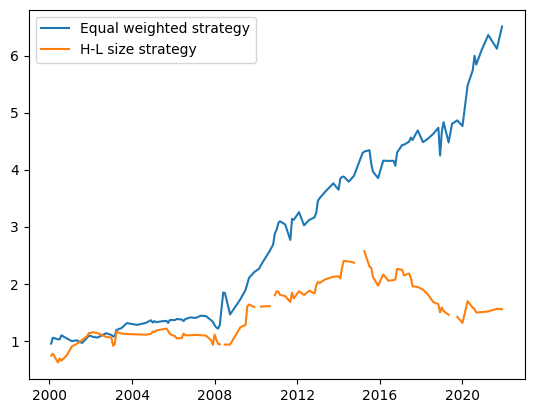

In [ ]:
# Plot the cumulative returns for all 3 strategies
cr_ew_portfolio_returns = (1 + ew_portfolio_returns).cumprod()
cr_total_portfolio_returns = (1 + total_portfolio_returns).cumprod()
plt.plot(cr_ew_portfolio_returns, label='Equal weighted strategy')
plt.plot(cr_total_portfolio_returns, label='H-L size strategy')
plt.legend()
plt.show()

Exercise 2: Find answers to the following questions by reading this article by Alpha Architect team: https://alphaarchitect.com/2014/10/07the-quantitative-value-investing-philosophy/
1. What measure of value is best?
2. How do we know that a value stock isn’t just one that is about to go bankrupt or is
manipulating its accounting numbers?
3. Can we find firms that are not just good values but that are actually good?
4. How many stocks should one hold?
5. Why isn’t everyone a value investor?

1) According to the article, the best measure of value is the enterprise multiple (EV/EBIT).

2) To determine if a value stock is not just one that is about to go bankrupt or is manipulating its accounting numbers, the article recommends using a quality score to evaluate the company's financial health and management's ability to generate profits and reinvest in the business.

3) Yes, the article suggests using a composite ranking system that combines measures of value, quality, and momentum to find firms that are not just good values but that are actually good.

4) The article suggests holding a portfolio of 30-50 stocks to achieve adequate diversification while still allowing for concentration in the best ideas.

5) The article proposes several reasons why not everyone is a value investor, including a lack of patience, a preference for high-growth stocks, and the tendency to be influenced by media hype and market trends. Additionally, the quantitative value investing approach can be complex and time-consuming, requiring significant research and analysis.